# **Jacob Shearer - Excercise set 2**

In [12]:
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib.pyplot as plt

**Question  1:**

In [2]:
# Part (a):
def o2_forward_diff(x, h):
    analytic_original = x * np.e**x
    analytic_2nd_derivative = (x + 2) * np.e**x
    
    approx_2nd_derivative = (((x + 2*h) * np.e**(x + 2*h)) - 2*((x + h) * np.e**(x + h)) + (x * np.e**x))/h**2
    
    error = np.abs(analytic_2nd_derivative - approx_2nd_derivative)
    return approx_2nd_derivative, error

def o2_central_diff(x, h):
    analytic_original = x * np.e**x
    analytic_2nd_derivative = (x + 2) * np.e**x
    
    approx_2nd_derivative = (((x + h) * np.e**(x + h)) + ((x - h) * np.e**(x - h)) - (2*(x * np.e**x)))/h**2
    
    error = np.abs(analytic_2nd_derivative - approx_2nd_derivative)
    return approx_2nd_derivative, error

In [22]:
print('Part (a):')
print('\n')

x = 2.0
h_values = [0.5, 0.45, 0.05]
forward_diff_errors = np.array([])
central_diff_errors = np.array([])

print('For the forward difference algorithm:')
for h in h_values:
    derivative, error = o2_forward_diff(x, h)
    print(f'     h = {h}: 2nd derivative = {derivative}')
    forward_diff_errors = np.append(forward_diff_errors, error)

print('\n')

print('For the central difference algorithm:')
for h in h_values:
    derivative, error = o2_central_diff(x, h)
    print(f'     h = {h}: 2nd derivative = {derivative}')
    central_diff_errors = np.append(central_diff_errors, error)

Part (a):


For the forward difference algorithm:
     h = 0.5: 2nd derivative = 56.48901265562777
     h = 0.45: 2nd derivative = 52.840665901489125
     h = 0.05: 2nd derivative = 31.46979135824423


For the central difference algorithm:
     h = 0.5: 2nd derivative = 30.490176446172697
     h = 0.45: 2nd derivative = 30.311130120446194
     h = 0.05: 2nd derivative = 29.56546174215901


Part (b):


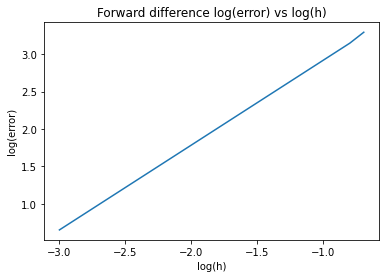

Slope of the plot from fit: 1.1433715579135624
This slope indicates that the forward difference error is proportional to h to the power of one, as expected.


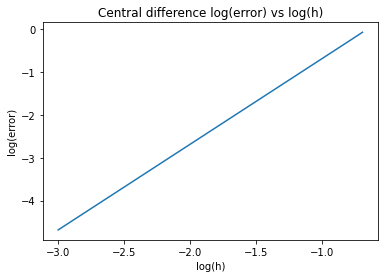

Slope of the plot from fit: 2.004445677571337
This slope indicates that the central difference error is proportional to h to the power of two, as expected.


In [21]:
# Part (b)
print('Part (b):')

fit_function = lambda x, a, b: a*x + b

# Forward difference plot
plt.plot(np.log(h_values), np.log(forward_diff_errors))
plt.title('Forward difference log(error) vs log(h)')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.show()

fd_params, fd_pcov = sp.optimize.curve_fit(fit_function, np.log(h_values), np.log(forward_diff_errors))
print(f'Slope of the plot from fit: {fd_params[0]}')
print('This slope indicates that the forward difference error is proportional to h to the power of one, as expected.')

# Central difference plot
plt.plot(np.log(h_values), np.log(central_diff_errors))
plt.title('Central difference log(error) vs log(h)')
plt.xlabel('log(h)')
plt.ylabel('log(error)')
plt.show()

cd_params, cd_pcov = sp.optimize.curve_fit(fit_function, np.log(h_values), np.log(central_diff_errors))
print(f'Slope of the plot from fit: {cd_params[0]}')
print('This slope indicates that the central difference error is proportional to h to the power of two, as expected.')

The error of each derivative, $\epsilon$, is related to the step size, $h$, by a power law, or:
    $$ \epsilon = kh^n$$
<br/>
Where $k$ is an arbitrary constant and $n$ is the power law exponent that relates $\epsilon$ and $h$. When we calculate the slopes of these plots, we are essentially just computing the following expression:
    $$ slope = \frac{log(\epsilon_2) - log(\epsilon_1)}{log(h_2) - log(h_1)} = \frac{log(kh_2^n) - log(kh_1^n)}{log(h_2) - log(h_1)}$$
<br/>
Logarithms have the following property:
    $$ log(x^n) = n \cdot log(x) $$
<br/>
Applying this property to the expression, 
    $$ slope = \frac{n(log(kh_2) - log(kh_1))}{log(h_2) - log(h_1)}$$
<br/>
    $$ = \frac{nlog(\frac{h_2}{h_1})}{log(\frac{h_2}{h_1})} $$
<br/>
    $$ = n$$
<br/>
Therefore, the slope of a log-log plot is just equal to the power law exponent. 